<h1>Ambulance Path Optimization and Analysis of Road efficiency in Ambulance Services using Network Analysis</h1>

><h5>COURSE CODE: CSE3021</h5>
><h5>COURSE SLOT: C1 + TC1</h5>
><h5>COURSE TITLE: Social Information Networks</h5>
><h5>COURSE FACULTY: Dr. L. Jani Anbrasi</h5>


<h3>TEAM MEMBERS</h3>
<h5>Sumegh S Gonugade | 20BCE1100</h5>
<h5>G Nithish Kanna | 20BCE1304</h5>
<h5>Anchana V | 20BCE1788</h5>

# Loading the required libraries

In [225]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from sklearn.preprocessing import LabelEncoder

# Reading the edge list as csv file and making a dataframe out of it

In [226]:
edge_data = pd.read_csv("/kaggle/input/edge-data/edge_data.csv")
edge_data.columns = ['From','To']
edge_data.head()

,From,To
0,10,0
1,10,7
2,0,10
3,0,7
4,0,1


# In case edge list is categorical values then,

In [227]:
edge_data = edge_data.apply(LabelEncoder().fit_transform)
edge_data.head()

,From,To
0,10,0
1,10,7
2,0,10
3,0,7
4,0,1


# Converting edge list dataframe into graph

In [228]:
edges = []
for a,b,c in edge_data.to_records().tolist():
    edges.append((b,c))

graph = nx.Graph(edges)

'''Storing the total number of ndoes and edges in the graph'''
n = len(graph.nodes())
e = len(graph.edges())

print(f'\n----GRAPH INFO----\n')
print(f'Node count : {n}\n')
print(f'Edge count : {e}\n')


----GRAPH INFO----

Node count : 12

Edge count : 21



# Visualising the formed graph

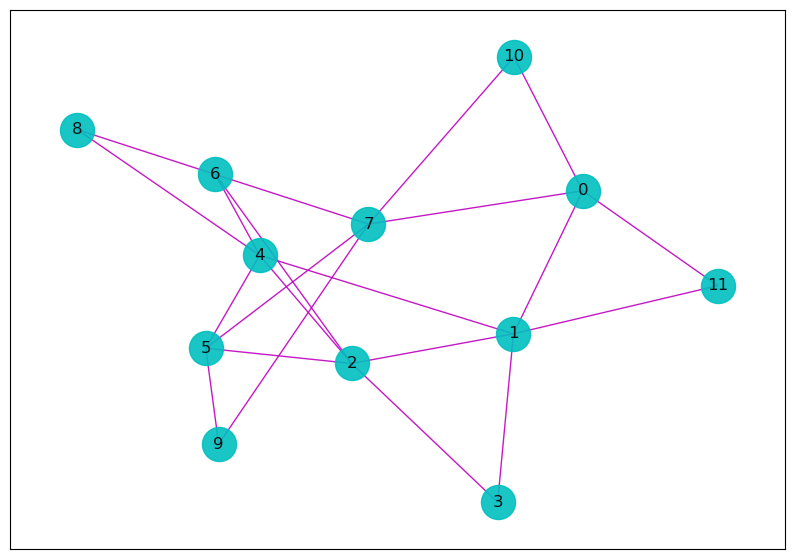

In [229]:
fig = plt.figure(figsize = (10,7))
nx.draw_networkx(graph, with_labels = True,node_color = 'c', node_size = 600, alpha = 0.9, edge_color = 'm')
plt.show()

In [230]:
plt.savefig('graph.png')

<Figure size 640x480 with 0 Axes>

# Splitting the nodes in network as *Hospital* , *Accident Prone Zone* , *Normal Places*

<h3>random.seed() function is used to ensure the same set of nodes are generated at each execution</h3>

In [231]:
'''List to store all nodes except the hospital nodes'''
rem = []

'''Taking 1/5 nodes as hospitals'''
hosc = int(n / 5)
hos = []
el = n - 1
random.seed(3)
for i in range(0,hosc):
    hos.append(random.randint(0, el))


'''Taking 2/5 nodes as accident prone zones'''
ambuc = int(2*n/5)
ambu = []
random.seed(4)
for i in range(0,ambuc):
    r = random.randint(0,el)
    while r in hos or r in ambu:
        r = random.randint(0,el)
    ambu.append(r)
    rem.append(r)


'''Taking the remaining nodes as normal places'''
norm = []
for i in range(0,n):
    if i not in hos and i not in ambu:
        norm.append(i)
        rem.append(i)

# After splitting

In [232]:
print('\n-----HOSPITALS-----\n')
c = 0
for i in hos:
    c += 1
    if c%20 == 0:
        print(f'{i}')
        continue
    print(f'{i}', end = ' , ') 


-----HOSPITALS-----

3 , 9 , 

In [233]:
print('\n-----ACCIDENT PRONE ZONES-----\n')
c = 0
for i in ambu:
    c += 1
    if c%20 == 0:
        print(f'{i}')
        continue
    print(f'{i}', end = ' , ') 


-----ACCIDENT PRONE ZONES-----

4 , 1 , 11 , 6 , 

In [234]:
print('\n-----NORMAL PLACES-----\n')
c = 0
for i in norm:
    c += 1
    if c%20 == 0:
        print(f'{i}')
        continue
    print(f'{i}', end = ' , ') 


-----NORMAL PLACES-----

0 , 2 , 5 , 7 , 8 , 10 , 

# Finding out the degree distribution

In [235]:
noddegs = nx.degree(graph)

print('\n-----DEGREE DISTRIBUTION-----\n')
c = 0
for i in range(0,n):
    c += 1
    if c%4 == 0:
        print(f'Node {i} degree : {noddegs[i]}')
        continue
    print(f'Node {i} degree : {noddegs[i]}', end = '\t')


-----DEGREE DISTRIBUTION-----

Node 0 degree : 4	Node 1 degree : 5	Node 2 degree : 5	Node 3 degree : 2
Node 4 degree : 5	Node 5 degree : 4	Node 6 degree : 4	Node 7 degree : 5
Node 8 degree : 2	Node 9 degree : 2	Node 10 degree : 2	Node 11 degree : 2


# Finding degree centrality of all nodes

In [236]:
noddegcen = nx.degree_centrality(graph)

print('\n-----DEGREE CENTRALITY DISTRIBUTION-----\n')
c = 0
for i in range(0,n):
    c += 1
    if c%4 == 0:
        print(f'Node {i} : {noddegcen[i]:.3f}')
        continue
    print(f'Node {i} : {noddegcen[i]:.3f}', end = '\t')


-----DEGREE CENTRALITY DISTRIBUTION-----

Node 0 : 0.364	Node 1 : 0.455	Node 2 : 0.455	Node 3 : 0.182
Node 4 : 0.455	Node 5 : 0.364	Node 6 : 0.364	Node 7 : 0.455
Node 8 : 0.182	Node 9 : 0.182	Node 10 : 0.182	Node 11 : 0.182


# Finding node with maximum degree centrality

In [237]:
maxdegcen = max(noddegcen.values())
maxcenn = 0
for i in noddegcen.keys():
    if maxdegcen == noddegcen[i]:
        maxcenn = i
        break
print(f'\nMaximum Degree Centrality Node : {maxcenn}\n')


Maximum Degree Centrality Node : 7



# Finding eigen vector centrality of all nodes

In [238]:
nodeig = nx.eigenvector_centrality(graph, max_iter = 1000)
print('\n-----EIGEN CENTRALITY DISTRIBUTION-----\n')
c = 0
for i in range(0,n):
    c += 1
    if c%4 == 0:
        print(f'Node {i} : {nodeig[i]:.3f}')
        continue
    print(f'Node {i} : {nodeig[i]:.3f}', end = '\t')


-----EIGEN CENTRALITY DISTRIBUTION-----

Node 0 : 0.245	Node 1 : 0.362	Node 2 : 0.417	Node 3 : 0.198
Node 4 : 0.415	Node 5 : 0.330	Node 6 : 0.338	Node 7 : 0.308
Node 8 : 0.191	Node 9 : 0.162	Node 10 : 0.140	Node 11 : 0.154


# Finding node with maximum eigen vector centrality

In [239]:
maxeig = max(nodeig.values())
maxeign = 0
for i in nodeig.keys():
    if maxeig == nodeig[i] and i in norm:
        maxeign = i
        break
print(f'\nMaximum Eigen Vector Centrality Node : {maxeign}\n')


Maximum Eigen Vector Centrality Node : 2



# For Every *Accident Prone Zone* printing the shortest path to *Hospitals*, if it exists

In [240]:
def accshphos(graph):
    print('\n---AMBULANCE ROUTE FROM EVERY ACCIDENT PRONE ZONE---\n')
    thc = 0
    nambu = 0
    npambu = 0
    for i in ambu:
        hc = 0
        mhc = 0
        print(f'\n---FOR ACCIDENT PRONE ZONE {i}---\n')
        for j in hos:
            if nx.has_path(graph,i,j):
                l = nx.shortest_path(graph,i,j)
                sl = l[:-1]
                if hos in sl:
                    mhc += 1
                hc += 1
                thc += 1
                print(f'\nRoute To Hospital {j} : {l}')
        print(f'\nHospitals Connected : {hc}')
        print(f'\nHospitals Disconnected :{hosc - hc}')
        print(f'\nRoutes with connecting more than one hospital : {mhc}\n')
        if hc == hosc:
            nambu+=1
        if hc == 0:
            npambu += 1
    print('\n----------------------------------------------------\n')

    avghc = int(thc / ambuc)
    print(f'\nMean of hospitals connected : {avghc}\n')
    if avghc == hosc:
        print('\nEvery accident prone zone is connected to every other hospital\n')
    
    return (nambu,npambu)

# Function to calculate the *Hospital Distance Dictionary*

In [241]:
'''

Hospital Distance Dictionary 
    1. The keys are the all nodes in graphs except the nodes labelled  as 'Hospitals'.
    2. The values for these keys are list, which represents the length of the shortest path from the key node to each hospital
       node in the graph.
       
'''
dis = {}
def dismat(graph):
    tssp = 0
    for i in rem:
        row = []
        for h in range(len(hos)):
            l = 0
            
            '''Checking if there is shortest path between given (node, hospital node)'''
            
            '''If True adding the shortest path length'''
            if nx.has_path(graph,i,hos[h]):
                l = nx.shortest_path_length(graph,i,hos[h])            
            else:
                l = -1
            row.append(l)  
        dis[i] = row
    
    print(f'\n-----HOSPITAL DISTANCE DICTIONARY-----\n')
    for i in dis.keys():
        print(f'\n----FOR NODE {i}----\n')
        for h in range(len(hos)):
            print(f'Distance from Hospital {hos[h]} : {dis[i][h]}\n')
            tssp += dis[i][h]
        print(f'\n##################################################\n')
        
    return tssp

# Function to find the choice list of nodes for a given node

In [242]:
'''

The choice list is done based on two parameters
    1. Number of hospitals connected through that node.
    2. Sum of shortest path lengths from that node to all the hospitals nodes connected to it.

The preference of parameters is
    1. The nodes with more count of hospitals connected will come first.
    2. If two nodes connect to same number of hospitals then, the node with minimum sum of shortest path lenghts comes first.
    
'''
def nxtnodli(graph,node):
    nei = []
    for ni in nx.all_neighbors(graph,node):
        if ni not in hos:
            nei.append(ni)
    sspl = []
    
    for i in nei:
        ssp = 0
        nhc = 0
        for h in range(len(hos)):
            if dis[i][h] != -1:
                nhc += 1
                ssp += dis[i][h]
        lab = ''
        if i in ambu:
            lab = 'Accident Prone Zone'
        else:
            lab = 'Normal Place'
        sspl.append((i,nhc,ssp,lab))
    
    '''First sorting is done based on number of hospitals nodes connected'''
    snei = sorted(sspl, key = lambda k : k[1], reverse = True)
    
    '''Second sorting is done based on the sum of shortest path lengths'''
    snei = sorted(snei, key = lambda k : k[2])
    
    return snei

# Finding the fortunate *Accident Prone Zone*

In [243]:
def lucacc(graph):
    lucacc = []
    for i in ambu:
        ssp = 0
        nh = 0
        for h in range(len(hos)):
            if dis[i][h] != -1:
                ssp += dis[i][h]
                nh += 1
        lucacc.append((i,nh, ssp))
                      
    lucacc = sorted(lucacc, key = lambda key : key[2])
    lucacc = sorted(lucacc, key = lambda key : key[1], reverse = True)
    
    print(f'\n-----FORTUNATE ACCIDENT PRONE ZONE-----\n')

    for a,b,c in lucacc:
        print(f'\nACCIDENT PRONE ZONE : {a}\n')
        print(f'TOTAL HOSPITALS CONNECTED : {b}\n')
        print(f'SUM OF SHORTEST PATHS TO CONNECTED HOSPITALS : {c}\n')
        print(f'################################################\n')
    return          

# Finding the *Busy Road*

In [244]:
def busrod(graph):
    edges = graph.edges()
    
    
    ambushos = {}
    road = []
    
    for i in ambu:
        for h in hos:
            if nx.has_path(graph,i,h):
                l = nx.shortest_path(graph,i,h)
                led  = []
                for e in range((len(l) - 1)):
                    led.append((l[e], l[e+1]))
                ambushos[(i,h)] = led
    
    for a,b in edges:
        t1 = (a,b)
        t2 = (b,a)
        occ = 0
        for j in ambushos.values():
            if t1 in j or t2 in j:
                occ += 1
        
        road.append((t1,occ))
    
    
    road = sorted(road, key = lambda k : k[1], reverse = True)
    maxocc = road[0][1]
        
    busroad = []
    for a,b in road:
        if b == maxocc:
            busroad.append((a,b))           
    return busroad

# Finding the *Most Serving Hospital*

In [245]:
def moshos(graph):
    
    mososp = ()
    hossp = []
    for i in range(len(hos)):
        na = 0
        ssa = 0
        for j in ambu:
            if dis[j][i] != -1:
                na += 1
                ssa += dis[j][i]
        hossp.append((hos[i],na,ssa))
    
    
    hossp = sorted(hossp, key = lambda k : k[2])
    hossp = sorted(hossp, key = lambda k : k[1], reverse = True)
    
    moshoss = []
    moshosc = hossp[0]
    for i in hossp:
        if i[1] == moshosc[1] and i[2] == moshosc[2]:
            moshoss.append(i)

    
    print('\n-----MOST SERVING HOSPITAL-----\n')
    
    for a,b,c in moshoss:
        print(f'Hospital : {a}\n')
        print(f'Accident Prone Zones Connected : {b}\n')
        print(f'Sum of shortest path lengths to connected accident prone zones : {c}\n')
        print('-------------------------------------------------------------\n')
    
    return

# Creating a list to store the analysis result of each sample

In [246]:
rec = []

# Analysis of Graph 1

In [247]:
pambu = 0
poambu = 0
perrod = 0

In [248]:
#Finding the shortest path between every pair of connected accident prone zone and hospital
(pambu,poambu) = accshphos(graph)


---AMBULANCE ROUTE FROM EVERY ACCIDENT PRONE ZONE---


---FOR ACCIDENT PRONE ZONE 4---


Route To Hospital 3 : [4, 1, 3]

Route To Hospital 9 : [4, 5, 9]

Hospitals Connected : 2

Hospitals Disconnected :0

Routes with connecting more than one hospital : 0


---FOR ACCIDENT PRONE ZONE 1---


Route To Hospital 3 : [1, 3]

Route To Hospital 9 : [1, 0, 7, 9]

Hospitals Connected : 2

Hospitals Disconnected :0

Routes with connecting more than one hospital : 0


---FOR ACCIDENT PRONE ZONE 11---


Route To Hospital 3 : [11, 1, 3]

Route To Hospital 9 : [11, 0, 7, 9]

Hospitals Connected : 2

Hospitals Disconnected :0

Routes with connecting more than one hospital : 0


---FOR ACCIDENT PRONE ZONE 6---


Route To Hospital 3 : [6, 2, 3]

Route To Hospital 9 : [6, 7, 9]

Hospitals Connected : 2

Hospitals Disconnected :0

Routes with connecting more than one hospital : 0


----------------------------------------------------


Mean of hospitals connected : 2


Every accident prone zone is conn

In [249]:
#Finding the Hospital Distanc Dictionary
perrod = dismat(graph)


-----HOSPITAL DISTANCE DICTIONARY-----


----FOR NODE 4----

Distance from Hospital 3 : 2

Distance from Hospital 9 : 2


##################################################


----FOR NODE 1----

Distance from Hospital 3 : 1

Distance from Hospital 9 : 3


##################################################


----FOR NODE 11----

Distance from Hospital 3 : 2

Distance from Hospital 9 : 3


##################################################


----FOR NODE 6----

Distance from Hospital 3 : 2

Distance from Hospital 9 : 2


##################################################


----FOR NODE 0----

Distance from Hospital 3 : 2

Distance from Hospital 9 : 2


##################################################


----FOR NODE 2----

Distance from Hospital 3 : 1

Distance from Hospital 9 : 2


##################################################


----FOR NODE 5----

Distance from Hospital 3 : 2

Distance from Hospital 9 : 1


##################################################


----FOR NODE 7----


In [250]:
#Finding the nexgt node choice  list for any given node

s = int(input('Enter any node in the network : '))

cl = []
'''Checking if hospital nodes are immediate neigbours of given node'''
for i in hos:
    if i in nx.all_neighbors(graph,s):
        cl.append((i,1,0,'Hospital'))

'''Getting the choice list from function'''
for i in nxtnodli(graph,s):
        cl.append(i)
        
print('\n-----NODES TO CHOOSE NEXT-----\n')
for a,b,c,d in cl:
    print(f'Node : {a}\n')
    print(f'Node label : {d}\n')
    print(f'Total hospitals Connected through this node : {b}\n')
    print(f'Sum of shortest path lengths to connected hospitals : {c}\n')
    print('-------------------------------------------------------------\n')

Enter any node in the network :  5



-----NODES TO CHOOSE NEXT-----

Node : 9

Node label : Hospital

Total hospitals Connected through this node : 1

Sum of shortest path lengths to connected hospitals : 0

-------------------------------------------------------------

Node : 2

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 3

-------------------------------------------------------------

Node : 4

Node label : Accident Prone Zone

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 4

-------------------------------------------------------------

Node : 7

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 4

-------------------------------------------------------------



In [251]:
# Finding the next node choice list for all accident prone zones

for pz in ambu:
    cl = []
    '''Checking if hospital nodes are immediate neigbours of given node'''
    for i in hos:
        if i in nx.all_neighbors(graph,pz):
            cl.append((i,1,0,'Hospital'))

    '''Getting the choice list from function'''
    for i in nxtnodli(graph,pz):
            cl.append(i)

    print(f'\n-----FOR ACCIDENT PRONE ZONE {pz}-----\n')
    for a,b,c,d in cl:
        print(f'Node : {a}\n')
        print(f'Node label : {d}\n')
        print(f'Total hospitals Connected through this node : {b}\n')
        print(f'Sum of shortest path lengths to connected hospitals : {c}\n')
        print('-------------------------------------------------------------\n')


-----FOR ACCIDENT PRONE ZONE 4-----

Node : 2

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 3

-------------------------------------------------------------

Node : 5

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 3

-------------------------------------------------------------

Node : 1

Node label : Accident Prone Zone

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 4

-------------------------------------------------------------

Node : 6

Node label : Accident Prone Zone

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 4

-------------------------------------------------------------

Node : 8

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connec

In [252]:
#Finding the Fortunate Accident Prone Zone
lucacc(graph)


-----FORTUNATE ACCIDENT PRONE ZONE-----


ACCIDENT PRONE ZONE : 4

TOTAL HOSPITALS CONNECTED : 2

SUM OF SHORTEST PATHS TO CONNECTED HOSPITALS : 4

################################################


ACCIDENT PRONE ZONE : 1

TOTAL HOSPITALS CONNECTED : 2

SUM OF SHORTEST PATHS TO CONNECTED HOSPITALS : 4

################################################


ACCIDENT PRONE ZONE : 6

TOTAL HOSPITALS CONNECTED : 2

SUM OF SHORTEST PATHS TO CONNECTED HOSPITALS : 4

################################################


ACCIDENT PRONE ZONE : 11

TOTAL HOSPITALS CONNECTED : 2

SUM OF SHORTEST PATHS TO CONNECTED HOSPITALS : 5

################################################



In [253]:
#Finding the Most Serving Hospital 
moshos(graph)


-----MOST SERVING HOSPITAL-----

Hospital : 3

Accident Prone Zones Connected : 4

Sum of shortest path lengths to connected accident prone zones : 7

-------------------------------------------------------------



In [254]:
#Finding the Most Busy road
l = busrod(graph)
print(f'\n-----MOST BUSY ROADS-----\n')
for a,b in l:
    s,t = a
    print(f'\nSource Node: {s}\n')

    sl = ''
    tl = ''

    if s in ambu:
        sl = 'Accident Prone Zone'
    elif s in hos:
        sl = 'Hospital'
    else:
        sl = 'Normal Place'

        
    if t in ambu:
        tl = 'Accident Prone Zone'
    elif t in hos:
        tl = 'Hospital'
    else:
        tl = 'Normal Place'

    print(f'\nSource Node Label : {sl}\n')
    print(f'\nTarget Node : {t}\n')
    print(f'\nTarget Node Lablel : {tl}\n')
    print(f'\nNumber OF Routes Connects : {b}\n')
    print(f'\n###################################\n')


-----MOST BUSY ROADS-----


Source Node: 7


Source Node Label : Normal Place


Target Node : 9


Target Node Lablel : Hospital


Number OF Routes Connects : 3


###################################


Source Node: 1


Source Node Label : Accident Prone Zone


Target Node : 3


Target Node Lablel : Hospital


Number OF Routes Connects : 3


###################################



In [255]:
rec.append(('Graph',e,pambu,poambu, perrod))

# Removing the *Busy Road* and observing the change in analysis

In [256]:
graphbsr = nx.Graph(edges)
l = busrod(graphbsr)
for a,b in l:
    s,t = a
    graphbsr.remove_edge(s,t)

In [257]:
'''Storing the total number of ndoes and edges in the graph'''
brn = len(graphbsr.nodes())
bre = len(graphbsr.edges())

print(f'\n----GRAPH INFO----\n')
print(f'Node count : {brn}\n')
print(f'Edge count : {bre}\n')


----GRAPH INFO----

Node count : 12

Edge count : 19



# Visualising the new graph formed

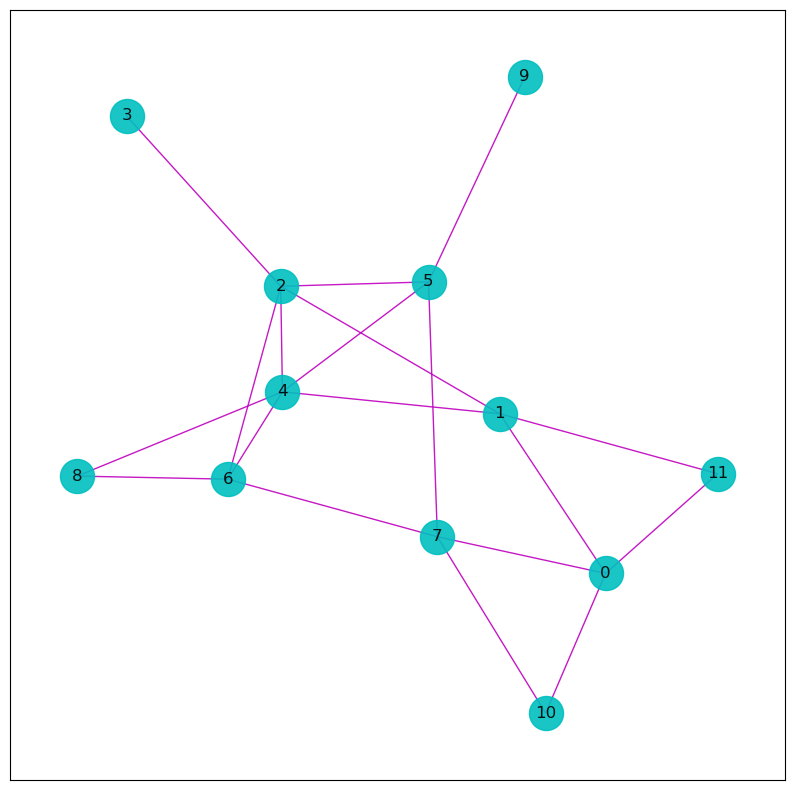

In [258]:
fig = plt.figure(figsize = (10,10))
nx.draw_networkx(graphbsr, with_labels = True,node_color = 'c', node_size = 600, alpha = 0.9, edge_color = 'm')
plt.show()

# Analysis of Graph 2

In [259]:
brpambu = 0
brpoambu = 0
brperrod = 0

In [260]:
#Finding the shortest path between every pair of connected accident prone zone and hospital
(brpambu,brpoambu) = accshphos(graphbsr)


---AMBULANCE ROUTE FROM EVERY ACCIDENT PRONE ZONE---


---FOR ACCIDENT PRONE ZONE 4---


Route To Hospital 3 : [4, 2, 3]

Route To Hospital 9 : [4, 5, 9]

Hospitals Connected : 2

Hospitals Disconnected :0

Routes with connecting more than one hospital : 0


---FOR ACCIDENT PRONE ZONE 1---


Route To Hospital 3 : [1, 2, 3]

Route To Hospital 9 : [1, 2, 5, 9]

Hospitals Connected : 2

Hospitals Disconnected :0

Routes with connecting more than one hospital : 0


---FOR ACCIDENT PRONE ZONE 11---


Route To Hospital 3 : [11, 1, 2, 3]

Route To Hospital 9 : [11, 0, 7, 5, 9]

Hospitals Connected : 2

Hospitals Disconnected :0

Routes with connecting more than one hospital : 0


---FOR ACCIDENT PRONE ZONE 6---


Route To Hospital 3 : [6, 2, 3]

Route To Hospital 9 : [6, 2, 5, 9]

Hospitals Connected : 2

Hospitals Disconnected :0

Routes with connecting more than one hospital : 0


----------------------------------------------------


Mean of hospitals connected : 2


Every accident prone 

In [261]:
#Finding the Hospital Distanc Dictionary
brperrod = dismat(graphbsr)


-----HOSPITAL DISTANCE DICTIONARY-----


----FOR NODE 4----

Distance from Hospital 3 : 2

Distance from Hospital 9 : 2


##################################################


----FOR NODE 1----

Distance from Hospital 3 : 2

Distance from Hospital 9 : 3


##################################################


----FOR NODE 11----

Distance from Hospital 3 : 3

Distance from Hospital 9 : 4


##################################################


----FOR NODE 6----

Distance from Hospital 3 : 2

Distance from Hospital 9 : 3


##################################################


----FOR NODE 0----

Distance from Hospital 3 : 3

Distance from Hospital 9 : 3


##################################################


----FOR NODE 2----

Distance from Hospital 3 : 1

Distance from Hospital 9 : 2


##################################################


----FOR NODE 5----

Distance from Hospital 3 : 2

Distance from Hospital 9 : 1


##################################################


----FOR NODE 7----


In [262]:
##### Finding the nexgt node choice  list for any given node

s = int(input('Enter any node in the network : '))

cl = []
'''Checking if hospital nodes are immediate neigbours of given node'''
for i in hos:
    if i in nx.all_neighbors(graphbsr,s):
        cl.append((i,1,0,'Hospital'))

'''Getting the choice list from function'''
for i in nxtnodli(graphbsr,s):
        cl.append(i)
        
print('\n-----NODES TO CHOOSE NEXT-----\n')
for a,b,c,d in cl:
    print(f'Node : {a}\n')
    print(f'Node label : {d}\n')
    print(f'Total hospitals Connected through this node : {b}\n')
    print(f'Sum of shortest path lengths to connected hospitals : {c}\n')
    print('-------------------------------------------------------------\n')

Enter any node in the network :  5



-----NODES TO CHOOSE NEXT-----

Node : 9

Node label : Hospital

Total hospitals Connected through this node : 1

Sum of shortest path lengths to connected hospitals : 0

-------------------------------------------------------------

Node : 2

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 3

-------------------------------------------------------------

Node : 4

Node label : Accident Prone Zone

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 4

-------------------------------------------------------------

Node : 7

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 5

-------------------------------------------------------------



In [263]:
# Finding the next node choice list for all accident prone zones

for pz in ambu:
    cl = []
    '''Checking if hospital nodes are immediate neigbours of given node'''
    for i in hos:
        if i in nx.all_neighbors(graphbsr,pz):
            cl.append((i,1,0,'Hospital'))

    '''Getting the choice list from function'''
    for i in nxtnodli(graphbsr,pz):
            cl.append(i)

    print(f'\n-----FOR ACCIDENT PRONE ZONE {pz}-----\n')
    for a,b,c,d in cl:
        print(f'Node : {a}\n')
        print(f'Node label : {d}\n')
        print(f'Total hospitals Connected through this node : {b}\n')
        print(f'Sum of shortest path lengths to connected hospitals : {c}\n')
        print('-------------------------------------------------------------\n')


-----FOR ACCIDENT PRONE ZONE 4-----

Node : 2

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 3

-------------------------------------------------------------

Node : 5

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 3

-------------------------------------------------------------

Node : 1

Node label : Accident Prone Zone

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 5

-------------------------------------------------------------

Node : 6

Node label : Accident Prone Zone

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 5

-------------------------------------------------------------

Node : 8

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connec

In [264]:
#Finding the Fortunate Accident Prone Zone
lucacc(graphbsr)


-----FORTUNATE ACCIDENT PRONE ZONE-----


ACCIDENT PRONE ZONE : 4

TOTAL HOSPITALS CONNECTED : 2

SUM OF SHORTEST PATHS TO CONNECTED HOSPITALS : 4

################################################


ACCIDENT PRONE ZONE : 1

TOTAL HOSPITALS CONNECTED : 2

SUM OF SHORTEST PATHS TO CONNECTED HOSPITALS : 5

################################################


ACCIDENT PRONE ZONE : 6

TOTAL HOSPITALS CONNECTED : 2

SUM OF SHORTEST PATHS TO CONNECTED HOSPITALS : 5

################################################


ACCIDENT PRONE ZONE : 11

TOTAL HOSPITALS CONNECTED : 2

SUM OF SHORTEST PATHS TO CONNECTED HOSPITALS : 7

################################################



In [265]:
#Finding the Most Serving Hospital
moshos(graphbsr)


-----MOST SERVING HOSPITAL-----

Hospital : 3

Accident Prone Zones Connected : 4

Sum of shortest path lengths to connected accident prone zones : 9

-------------------------------------------------------------



In [266]:
#Finding the Most Busy Road
l = busrod(graphbsr)
print(f'\n-----MOST BUSY ROADS-----\n')
for a,b in l:
    s,t = a
    print(f'\nSource Node: {s}\n')

    sl = ''
    tl = ''

    if s in ambu:
        sl = 'Accident Prone Zone'
    elif s in hos:
        sl = 'Hospital'
    else:
        sl = 'Normal Place'

        
    if t in ambu:
        tl = 'Accident Prone Zone'
    elif t in hos:
        tl = 'Hospital'
    else:
        tl = 'Normal Place'

    print(f'\nSource Node Label : {sl}\n')
    print(f'\nTarget Node : {t}\n')
    print(f'\nTarget Node Lablel : {tl}\n')
    print(f'\nNumber OF Routes Connects : {b}\n')
    print(f'\n###################################\n')


-----MOST BUSY ROADS-----


Source Node: 9


Source Node Label : Hospital


Target Node : 5


Target Node Lablel : Normal Place


Number OF Routes Connects : 4


###################################


Source Node: 3


Source Node Label : Hospital


Target Node : 2


Target Node Lablel : Normal Place


Number OF Routes Connects : 4


###################################



In [267]:
rec.append(('Graph with busy road removed',bre,brpambu, brpoambu, brperrod))

# Removing *2/5* edges and observing the change in analysis

In [268]:
grapher = nx.Graph(edges)
c = int(0.4*e)
for i in range(c):
    s = random.choice(list(grapher.nodes()))
    t = random.choice(list(grapher.nodes()))
    while not grapher.has_edge(s,t):
        s = random.choice(list(grapher.nodes()))
        t = random.choice(list(grapher.nodes()))
    print(f'--- REMOVED EDGE : {s} -> {t} ---\n')
    grapher.remove_edge(s,t)

--- REMOVED EDGE : 7 -> 0 ---

--- REMOVED EDGE : 11 -> 1 ---

--- REMOVED EDGE : 2 -> 1 ---

--- REMOVED EDGE : 10 -> 0 ---

--- REMOVED EDGE : 8 -> 4 ---

--- REMOVED EDGE : 5 -> 9 ---

--- REMOVED EDGE : 1 -> 0 ---

--- REMOVED EDGE : 3 -> 1 ---



In [269]:
'''Storing the total number of ndoes and edges in the graph'''
ern = len(grapher.nodes())
ere = len(grapher.edges())

print(f'\n----GRAPH INFO----\n')
print(f'Node count : {ern}\n')
print(f'Edge count : {ere}\n')


----GRAPH INFO----

Node count : 12

Edge count : 13



# Visualising the new graph formed

In [270]:
print(f'Total edges before removing : {e}\n')
print(f'Total edges after removing : {ere}')

Total edges before removing : 21

Total edges after removing : 13


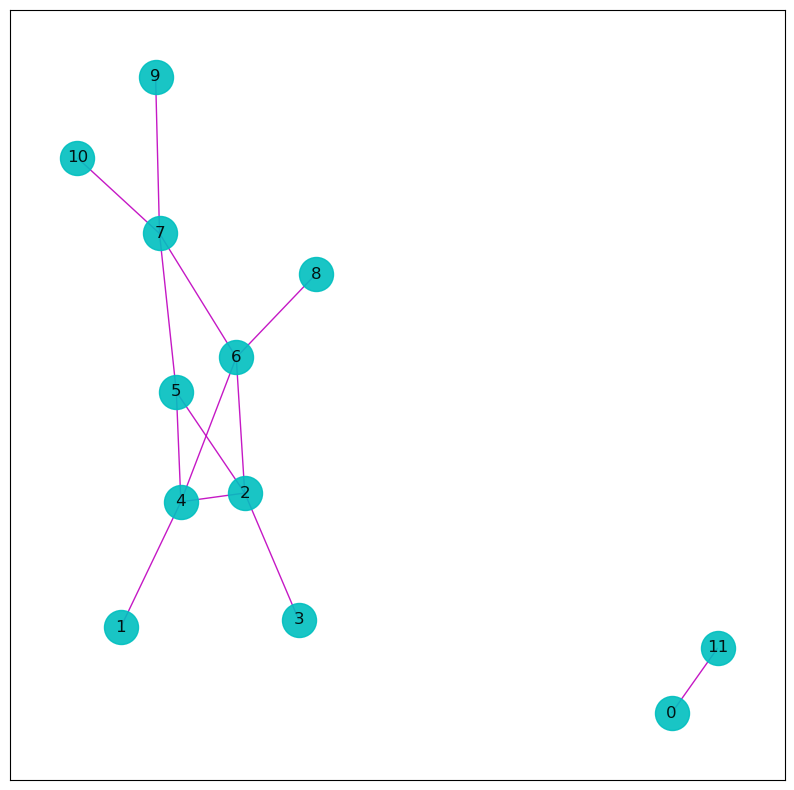

In [271]:
fig = plt.figure(figsize = (10,10))
nx.draw_networkx(grapher, with_labels = True,node_color = 'c', node_size = 600, alpha = 0.9, edge_color = 'm')
plt.show()

# Analysis of Graph 3

In [272]:
erpambu = 0
erpoambu = 0
erperrod = 0

In [273]:
#Finding the shortest path between every pair of connected accident prone zone and hospital
(erpambu,erpoambu) = accshphos(grapher)


---AMBULANCE ROUTE FROM EVERY ACCIDENT PRONE ZONE---


---FOR ACCIDENT PRONE ZONE 4---


Route To Hospital 3 : [4, 2, 3]

Route To Hospital 9 : [4, 6, 7, 9]

Hospitals Connected : 2

Hospitals Disconnected :0

Routes with connecting more than one hospital : 0


---FOR ACCIDENT PRONE ZONE 1---


Route To Hospital 3 : [1, 4, 2, 3]

Route To Hospital 9 : [1, 4, 6, 7, 9]

Hospitals Connected : 2

Hospitals Disconnected :0

Routes with connecting more than one hospital : 0


---FOR ACCIDENT PRONE ZONE 11---


Hospitals Connected : 0

Hospitals Disconnected :2

Routes with connecting more than one hospital : 0


---FOR ACCIDENT PRONE ZONE 6---


Route To Hospital 3 : [6, 2, 3]

Route To Hospital 9 : [6, 7, 9]

Hospitals Connected : 2

Hospitals Disconnected :0

Routes with connecting more than one hospital : 0


----------------------------------------------------


Mean of hospitals connected : 1



In [274]:
#Finding the Hospital Distanc Dictionary
erperrod = dismat(grapher)


-----HOSPITAL DISTANCE DICTIONARY-----


----FOR NODE 4----

Distance from Hospital 3 : 2

Distance from Hospital 9 : 3


##################################################


----FOR NODE 1----

Distance from Hospital 3 : 3

Distance from Hospital 9 : 4


##################################################


----FOR NODE 11----

Distance from Hospital 3 : -1

Distance from Hospital 9 : -1


##################################################


----FOR NODE 6----

Distance from Hospital 3 : 2

Distance from Hospital 9 : 2


##################################################


----FOR NODE 0----

Distance from Hospital 3 : -1

Distance from Hospital 9 : -1


##################################################


----FOR NODE 2----

Distance from Hospital 3 : 1

Distance from Hospital 9 : 3


##################################################


----FOR NODE 5----

Distance from Hospital 3 : 2

Distance from Hospital 9 : 2


##################################################


----FOR NODE 7-

In [275]:
#Finding the nexgt node choice  list for any given node

s = int(input('Enter any node in the network : '))

cl = []
'''Checking if hospital nodes are immediate neigbours of given node'''
for i in hos:
    if i in nx.all_neighbors(grapher,s):
        cl.append((i,1,0,'Hospital'))

'''Getting the choice list from function'''
for i in nxtnodli(grapher,s):
        cl.append(i)
        
print('\n-----NODES TO CHOOSE NEXT-----\n')
for a,b,c,d in cl:
    print(f'Node : {a}\n')
    print(f'Node label : {d}\n')
    print(f'Total hospitals Connected through this node : {b}\n')
    print(f'Sum of shortest path lengths to connected hospitals : {c}\n')
    print('-------------------------------------------------------------\n')

Enter any node in the network :  5



-----NODES TO CHOOSE NEXT-----

Node : 2

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 4

-------------------------------------------------------------

Node : 7

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 4

-------------------------------------------------------------

Node : 4

Node label : Accident Prone Zone

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 5

-------------------------------------------------------------



In [276]:
# Finding the next node choice list for all accident prone zones

for pz in ambu:
    cl = []
    '''Checking if hospital nodes are immediate neigbours of given node'''
    for i in hos:
        if i in nx.all_neighbors(grapher,pz):
            cl.append((i,1,0,'Hospital'))

    '''Getting the choice list from function'''
    for i in nxtnodli(grapher,pz):
            cl.append(i)

    print(f'\n-----FOR ACCIDENT PRONE ZONE {pz}-----\n')
    for a,b,c,d in cl:
        print(f'Node : {a}\n')
        print(f'Node label : {d}\n')
        print(f'Total hospitals Connected through this node : {b}\n')
        print(f'Sum of shortest path lengths to connected hospitals : {c}\n')
        print('-------------------------------------------------------------\n')


-----FOR ACCIDENT PRONE ZONE 4-----

Node : 6

Node label : Accident Prone Zone

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 4

-------------------------------------------------------------

Node : 2

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 4

-------------------------------------------------------------

Node : 5

Node label : Normal Place

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 4

-------------------------------------------------------------

Node : 1

Node label : Accident Prone Zone

Total hospitals Connected through this node : 2

Sum of shortest path lengths to connected hospitals : 7

-------------------------------------------------------------


-----FOR ACCIDENT PRONE ZONE 1-----

Node : 4

Node label : Accident Prone Zone

Total hospitals Connected through this nod

In [277]:
#Finding the Fortunate Accident Prone Zone
lucacc(grapher)


-----FORTUNATE ACCIDENT PRONE ZONE-----


ACCIDENT PRONE ZONE : 6

TOTAL HOSPITALS CONNECTED : 2

SUM OF SHORTEST PATHS TO CONNECTED HOSPITALS : 4

################################################


ACCIDENT PRONE ZONE : 4

TOTAL HOSPITALS CONNECTED : 2

SUM OF SHORTEST PATHS TO CONNECTED HOSPITALS : 5

################################################


ACCIDENT PRONE ZONE : 1

TOTAL HOSPITALS CONNECTED : 2

SUM OF SHORTEST PATHS TO CONNECTED HOSPITALS : 7

################################################


ACCIDENT PRONE ZONE : 11

TOTAL HOSPITALS CONNECTED : 0

SUM OF SHORTEST PATHS TO CONNECTED HOSPITALS : 0

################################################



In [278]:
#Finding the Most Serving Hospital
moshos(grapher)


-----MOST SERVING HOSPITAL-----

Hospital : 3

Accident Prone Zones Connected : 3

Sum of shortest path lengths to connected accident prone zones : 7

-------------------------------------------------------------



In [279]:
#Finding the Most Busy Road
l = busrod(grapher)
print(f'\n-----MOST BUSY ROADS-----\n')
for a,b in l:
    s,t = a
    print(f'\nSource Node: {s}\n')

    sl = ''
    tl = ''

    if s in ambu:
        sl = 'Accident Prone Zone'
    elif s in hos:
        sl = 'Hospital'
    else:
        sl = 'Normal Place'

        
    if t in ambu:
        tl = 'Accident Prone Zone'
    elif t in hos:
        tl = 'Hospital'
    else:
        tl = 'Normal Place'

    print(f'\nSource Node Label : {sl}\n')
    print(f'\nTarget Node : {t}\n')
    print(f'\nTarget Node Lablel : {tl}\n')
    print(f'\nNumber OF Routes Connects : {b}\n')
    print(f'\n###################################\n')


-----MOST BUSY ROADS-----


Source Node: 7


Source Node Label : Normal Place


Target Node : 9


Target Node Lablel : Hospital


Number OF Routes Connects : 3


###################################


Source Node: 7


Source Node Label : Normal Place


Target Node : 6


Target Node Lablel : Accident Prone Zone


Number OF Routes Connects : 3


###################################


Source Node: 3


Source Node Label : Hospital


Target Node : 2


Target Node Lablel : Normal Place


Number OF Routes Connects : 3


###################################



In [280]:
rec.append(('Graph with 2/5 roads removed',ere,erpambu,erpoambu, erperrod))

# Forming a data frame from results of all samples

In [281]:
'''
Perfect Accident Prone Zone : Accident Prone Zone that is connected to every hospital present in the network
Poor Accident Prone Zone : Accident Prone Zone that is not connected to any hospital present in the network
'''
compana = pd.DataFrame(rec, columns = ['Graph','Edges','Perfect_Accident_Prone_Zone','Poor_Accident_Prone_Zone','Sum_Shortest_Paths'])

compana

,Graph,Edges,Perfect_Accident_Prone_Zone,Poor_Accident_Prone_Zone,Sum_Shortest_Paths
0,Graph,21,4,0,42
1,Graph with busy road removed,19,4,0,51
2,Graph with 2/5 roads removed,13,3,1,36


# Conclusion 

<h4></h4>

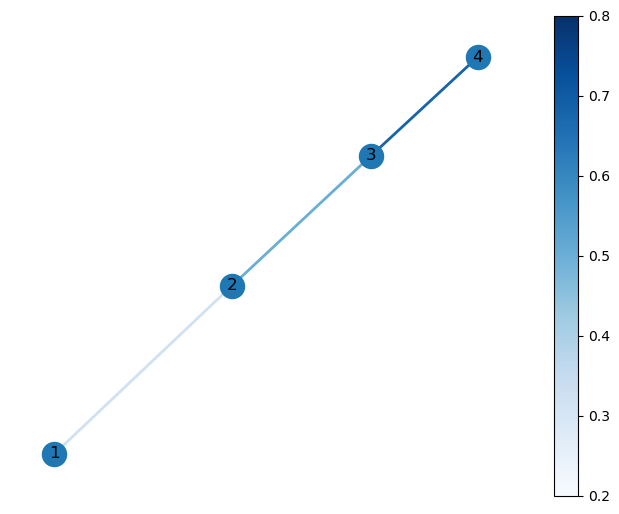

In [282]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph()
G.add_edge(1, 2, weight=0.2)
G.add_edge(2, 3, weight=0.5)
G.add_edge(3, 4, weight=0.8)

# Get the weights of all edges
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Define a color map that maps edge weights to colors
cmap = plt.cm.get_cmap('Blues')
colors = [cmap(w) for w in weights]

# Draw the graph with edge colors based on their weights
pos = nx.spring_layout(G)
nx.draw(G, pos, edge_color=colors, width=2, with_labels=True)

# Add a colorbar to show the mapping between colors and weights
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
sm._A = []
plt.colorbar(sm)

# Show the plot
plt.show()